In [1]:
import pandas as pd
import pickle
import numpy as np

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Import the different sheets.

yrs = ["2019", "2020"]
df = pd.DataFrame()

for sheet in yrs:
    temp_df = pd.read_excel("../data/2019 - 2020 JCRP Metrics -EB.xlsx", 
                   sheet_name = sheet)
    df = pd.concat([df, temp_df])

In [3]:
df = df.dropna(axis=0, how="all")

In [4]:
# A lot of the Title entries are "Selected Abstracts..." and are from "Literature Update" article types.
# However, the Vol 40 doesn't have article type so have to look through titles.

df = df[df["Title"].str.contains("Selected Abstracts From Recent Publications") == False]

### Sentiment Analysis.

In [5]:
# Calculate Sentiment score.

analyzer = SentimentIntensityAnalyzer()
df['score'] = df.Title.map(analyzer.polarity_scores).map(lambda x: x.get('compound'))

### Sentiment Graphing

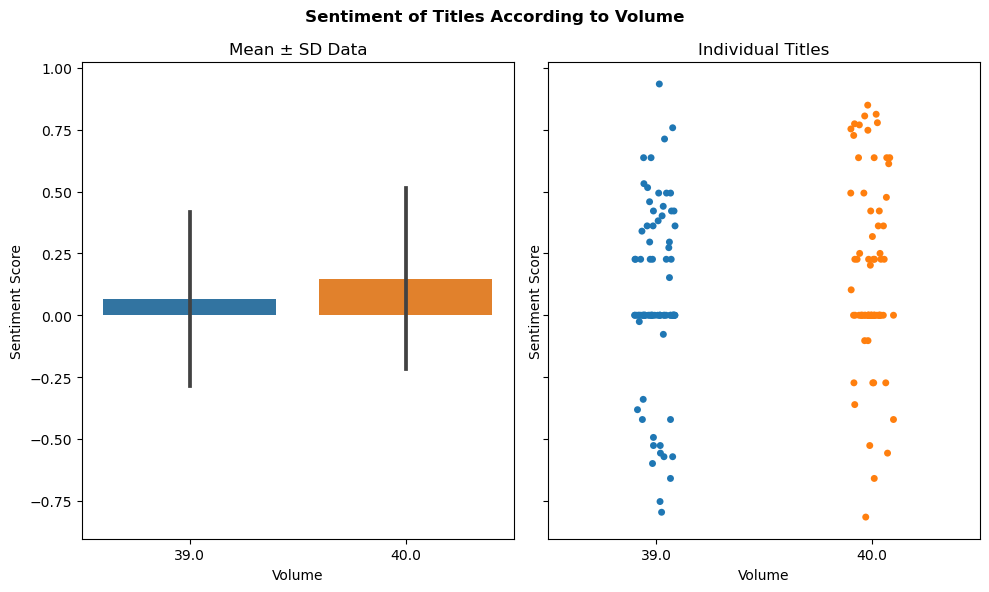

In [19]:
fig, ax = plt.subplots(1,2, sharey=True, figsize = (10,6))
fig.suptitle("Sentiment of Titles According to Volume",weight='bold')

sns.barplot(ax=ax[0],
            x="Volume",
            y="score",
            data=df,
            ci="sd")
ax[0].set_title('Mean ± SD Data')
ax[0].set_ylabel('Sentiment Score')

sns.stripplot(ax=ax[1],
              x="Volume",
              y="score",
              data=df)
ax[1].set_title('Individual Titles')
ax[1].set_ylabel('Sentiment Score')

plt.tight_layout() 
plt.show()
# plt.savefig("../images/sentiment_vs_volume")

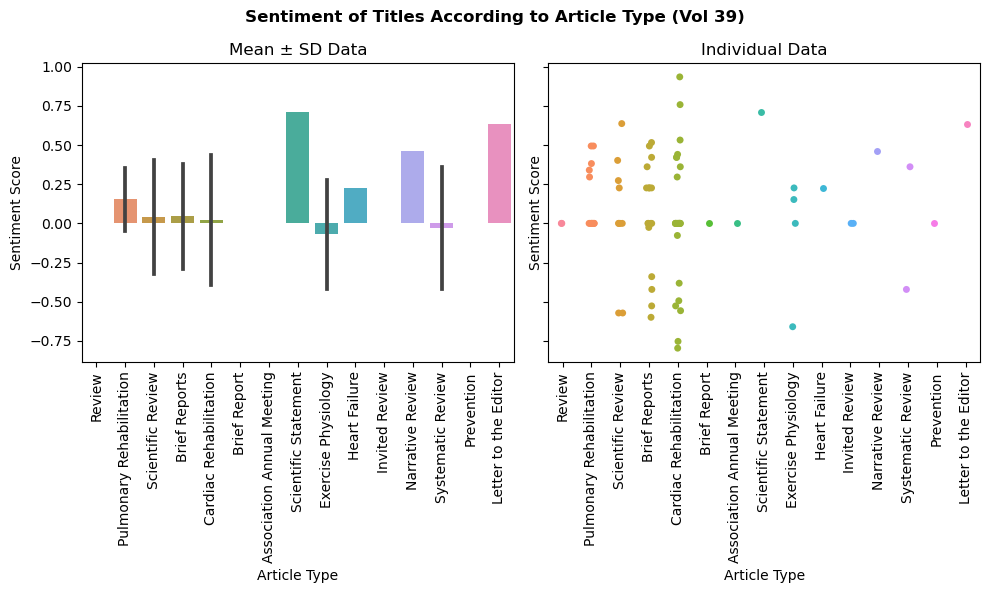

In [20]:
# No article types provided for Volume 40.

fig, ax = plt.subplots(1,2, sharey=True, figsize = (10,6))
fig.suptitle("Sentiment of Titles According to Article Type (Vol 39)",weight='bold')

sns.barplot(ax=ax[0],
            x="Article Type",
            y="score",
            data=df,
#             data=df.groupby("Article Type").filter(lambda x: len(x) > 2),
            ci="sd")
ax[0].set_title('Mean ± SD Data')
ax[0].set_ylabel('Sentiment Score')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation = 90)


sns.stripplot(ax=ax[1],
              x="Article Type",
              y="score",
              data=df)
ax[1].set_title('Individual Data')
ax[1].set_ylabel('Sentiment Score')
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation = 90)

plt.tight_layout() 
plt.show()
# plt.savefig("../images/sentiment_vs_type")

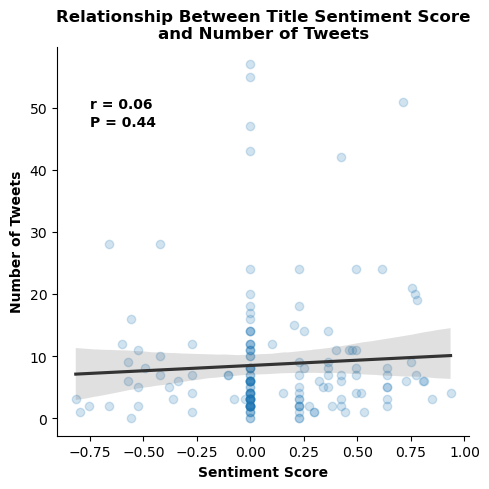

In [21]:
from scipy.stats import pearsonr
df_fig = df.dropna(subset=["score", "Tweets"])
corr, p = pearsonr(df_fig["score"], df_fig["Tweets"])


sns.lmplot(x="score",
           y="Tweets",
           data=df_fig,
            scatter_kws={'alpha':0.2}, 
            line_kws={"color": "0.2"})

plt.text(-0.75, 50, f"r = {corr:.2f}", horizontalalignment='left', size='medium', color='black', weight='semibold')
p_val = "< 0.05" if p < 0.05 else f"= {p:.2f}"
plt.text(-0.75, 47, f"P {p_val}", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title("Relationship Between Title Sentiment Score\nand Number of Tweets", weight="bold")
plt.ylabel('Number of Tweets', weight="bold")
plt.xlabel('Sentiment Score', weight="bold")

plt.tight_layout() 
plt.show()

# plt.savefig("../images/sentiment_vs_tweets")